<a href="https://colab.research.google.com/github/chanducpu/Housing-Data-Cleaning/blob/main/Houses_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import haversine as hs
from haversine import Unit

# Loading the data and  Names for the Accident

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Housing_Pricing/raw_house_data - raw_house_data.csv")

In [ ]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(9), int64(4), object(3)
memory 

In [ ]:
df.shape

(5000, 16)

In [ ]:
df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6


[link text](https://www.geeksforgeeks.org/matplotlib-step-by-step-guide/)

#Filling null values of the Bathrooms

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['bathrooms'].drop('bathrooms')

print(correlations)

MLS          -0.060956
sold_price    0.326717
zipcode      -0.052878
longitude     0.015003
latitude     -0.080500
lot_acres     0.055080
taxes         0.008979
year_built   -0.066397
bedrooms      0.687336
sqrt_ft       0.701917
garage        0.113944
fireplaces    0.225672
Name: bathrooms, dtype: float64


In [ ]:
bathroom_avg = df.groupby('bedrooms')['bathrooms'].mean().round(1)
bathroom_avg = (bathroom_avg *2).round()/2
df['bathrooms'] = df['bathrooms'].fillna(df['bedrooms'].map(bathroom_avg))


#Filling the null values of the sqrt_ft

In [ ]:
sqrt_avg = df.groupby(['bedrooms','bathrooms'])['sqrt_ft'].mean()
df['sqrt_ft'] = df['sqrt_ft'].fillna(df.apply(lambda row: sqrt_avg.get((row['bedrooms'], row['bathrooms'])), axis=1))

#Filling the null values of the Garage

In [ ]:
garage_avg = df.groupby(['bedrooms','bathrooms'])['garage'].mean().round()
df['garage']=df['garage'].fillna(df.apply(lambda row: sqrt_avg.get((row['bedrooms'], row['bathrooms'])), axis=1))

#Filling the Null values of Fire_Place

In [ ]:
fireplaces_avg = df.groupby(['bedrooms','bathrooms','garage'])['fireplaces'].mean().round()
df['fireplaces']=df['fireplaces'].fillna(df.apply(lambda row: fireplaces_avg.get((row['bedrooms'], row['bathrooms'],row['garage'])), axis=1))

In [ ]:
df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,0


In [ ]:
df.fireplaces.unique()

array([6., 5., 4., 1., 2., 3., 7., 0., 9., 8.])

#Filling the Null values and Normalizing the HOA

In [ ]:
df.HOA.nunique()

380

In [ ]:
df.HOA=df.HOA.str.replace(",","")

In [ ]:
df.HOA=df.HOA.astype(float)

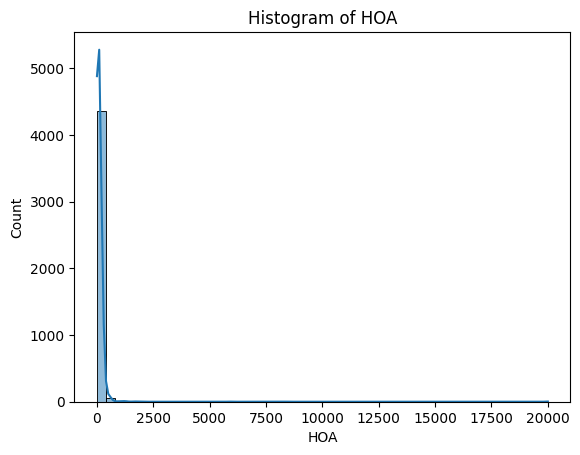

In [ ]:
sns.histplot(x = 'HOA', data = df, kde=True,bins=50)
plt.title("Histogram of HOA")
plt.show()

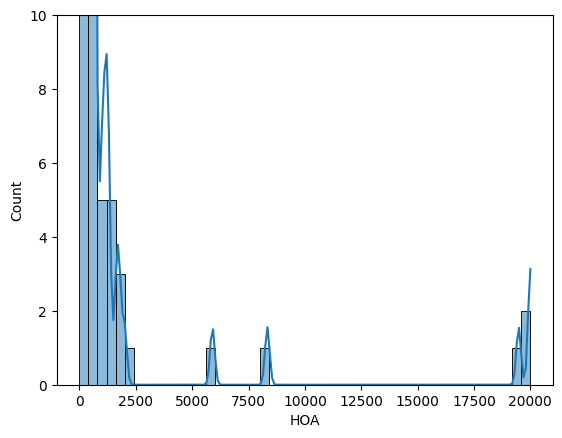

In [ ]:
sns.histplot(x = 'HOA', data = df, kde=True,bins=50)
plt.ylim(0,10)
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['HOA'].drop('HOA')

print(correlations)

MLS          -0.018158
sold_price    0.171170
zipcode      -0.024722
longitude    -0.021703
latitude      0.030892
lot_acres    -0.008533
taxes         0.004560
year_built    0.015036
bedrooms     -0.067988
bathrooms     0.004679
sqrt_ft       0.002003
garage       -0.039678
fireplaces    0.006308
Name: HOA, dtype: float64


In [ ]:

median_hoa = df['HOA'].median()
df['HOA'] = df['HOA'].fillna(median_hoa)
df['log_HOA'] = np.log1p(df['HOA'])


In [ ]:
df.log_HOA

,log_HOA
0,0.000000
1,0.000000
2,4.043051
3,4.043051
4,4.025352
...,...
4995,4.043051
4996,3.784190
4997,4.043051
4998,4.043051


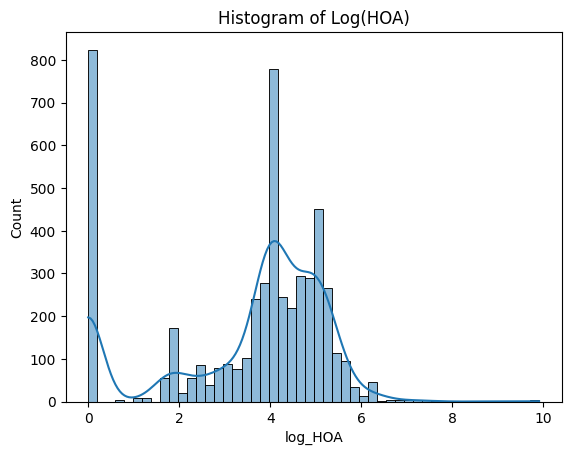

In [ ]:
sns.histplot(x = 'log_HOA', data = df, kde=True,bins=50)
plt.title("Histogram of Log(HOA)")
plt.show()

#Working on the Kitchen Feature
## Filling the null values and getting the onehot encoding
###considering the kitchen features atleast 5% of the home's had

In [ ]:
df.kitchen_features

,kitchen_features
0,"Dishwasher, Freezer, Refrigerator, Oven"
1,"Dishwasher, Garbage Disposal"
2,"Dishwasher, Garbage Disposal, Refrigerator"
3,"Dishwasher, Double Sink, Pantry: Butler, Refri..."
4,"Dishwasher, Garbage Disposal, Refrigerator, Mi..."
...,...
4995,"Dishwasher, Double Sink, Garbage Disposal, Gas..."
4996,"Dishwasher, Double Sink, Electric Range, Garba..."
4997,"Dishwasher, Electric Range, Island, Refrigerat..."
4998,"Dishwasher, Double Sink, Garbage Disposal, Gas..."


In [ ]:
df.kitchen_features=df.kitchen_features.fillna("None")

In [ ]:
dic_kitchen={}
for x in df.kitchen_features:
  x=x.replace("Stainless","").replace(":","").split(",")
  for y in x:
    y=y.strip().lower()
    if(y in dic_kitchen.keys()):
      dic_kitchen[y]+=1
    else:
      dic_kitchen[y]=1

In [ ]:
type(df.kitchen_features[0])

str

In [ ]:
df.kitchen_features[140].split(",")

['Dishwasher',
 ' Double Sink',
 ' Garbage Disposal',
 ' Indoor Grill',
 ' Island',
 ' Pantry: Walk-In',
 ' Refrigerator',
 ' Appliance Color: Stainless',
 ' Countertops: Granite',
 ' Microwave: Stainless']

In [ ]:
count=0
features=[]
filling=[]
for x,y in dic_kitchen.items():
  if(y>250):
    features.append(x)
    print(x,y)
    if(y>3000 and y not in filling):
      filling.append(x)

dishwasher 4857
freezer 395
refrigerator 4232
oven 2992
garbage disposal 4520
double sink 1164
microwave 2745
compactor 432
electric range 400
island 1253
appliance color 1298
gas range 1307
prep sink 303
countertops granite 1017
desk 327
lazy susan 332
pantry walk-in 630
pantry closet 435
pantry cabinet 313


In [ ]:
len(features)

19

In [ ]:
",".join(filling)

'dishwasher,refrigerator,garbage disposal'

##Filling the null values of atleast 60% of homes features .

In [ ]:
df.kitchen_features=df.kitchen_features.str.replace("None",",".join(filling))

In [ ]:
def onehot(x,feature):
  val=x.replace("Stainless","").replace(":","").split(",")
  for zz in val:
    zz=zz.strip().lower()
    if(zz==feature.lower()):
      return 1
  return 0


In [ ]:
for feature in features:
  print(feature)
  df[feature] = df.kitchen_features.apply(lambda x :onehot(str(x),str(feature)))

dishwasher
freezer
refrigerator
oven
garbage disposal
double sink
microwave
compactor
electric range
island
appliance color
gas range
prep sink
countertops granite
desk
lazy susan
pantry walk-in
pantry closet
pantry cabinet


In [ ]:
df['pantry cabinet'].sum()

np.int64(313)

#Working on the Floor Covering
## Filling the null values and getting the onehot encoding
###considering the Floor Covering atleast 5% of the home's had

In [ ]:
df.floor_covering

,floor_covering
0,"Mexican Tile, Wood"
1,"Natural Stone, Other"
2,"Natural Stone, Other: Rock"
3,"Ceramic Tile, Laminate, Wood"
4,"Carpet, Concrete"
...,...
4995,"Carpet, Ceramic Tile"
4996,"Carpet, Ceramic Tile"
4997,Ceramic Tile
4998,"Carpet, Ceramic Tile"


In [ ]:
df.floor_covering=df.floor_covering.fillna("None")

In [ ]:
dic_floor={}
for k in df.floor_covering:
  k=k.split(",")
  for l in k:
    l=l.strip().lower()
    if(l in dic_floor.keys()):
      dic_floor[l]+=1
    else:
      dic_floor[l]=1

In [ ]:
count=0
features=[]
filling=[]
for x,y in dic_floor.items():
  if(y>250):
    features.append(x)
    if(y>3000 and y not in filling):
      filling.append(x)

In [ ]:
features

['mexican tile',
 'wood',
 'natural stone',
 'other',
 'ceramic tile',
 'carpet',
 'concrete']

In [ ]:
filling

['carpet']

In [ ]:
df.floor_coverings=df.floor_covering.str.replace("None",",".join(filling))

<ipython-input-41-92ff159440e0>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.floor_coverings=df.floor_covering.str.replace("None",",".join(filling))


In [ ]:
for feature in features:
    df[feature] = df.floor_covering.apply(lambda x: 1 if feature in x.lower() else 0)

In [ ]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA', 'log_HOA',
       'dishwasher', 'freezer', 'refrigerator', 'oven', 'garbage disposal',
       'double sink', 'microwave', 'compactor', 'electric range', 'island',
       'appliance color', 'gas range', 'prep sink', 'countertops granite',
       'desk', 'lazy susan', 'pantry walk-in', 'pantry closet',
       'pantry cabinet', 'mexican tile', 'wood', 'natural stone', 'other',
       'ceramic tile', 'carpet', 'concrete'],
      dtype='object')

In [ ]:
features

['mexican tile',
 'wood',
 'natural stone',
 'other',
 'ceramic tile',
 'carpet',
 'concrete']

In [ ]:
df.shape

(5000, 43)

In [ ]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,pantry walk-in,pantry closet,pantry cabinet,mexican tile,wood,natural stone,other,ceramic tile,carpet,concrete
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,...,0,0,0,1,1,0,0,0,0,0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,...,0,0,0,0,0,1,1,0,0,0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,...,0,0,0,0,0,1,1,0,0,0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,...,0,0,0,0,1,0,0,1,0,0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,0,0,0,0,0,0,0,0,1,1


#Working with Lot Acres
##Normalizing the Column

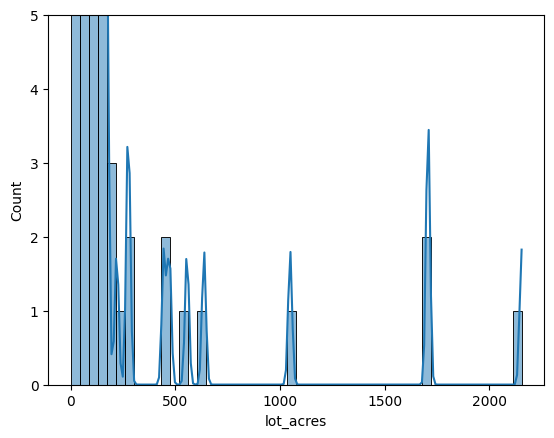

In [ ]:
sns.histplot(x = 'lot_acres', data = df, kde=True,bins=50)
plt.ylim(0, 5)
plt.show()

## Above Graph majority of the data lie below 50 acers , Above 50 there is 64 records which means 1.28% out of 5000 records .So removing the records,which had the Lot Acers more than 50

In [ ]:
df=df[df.lot_acres<50]

In [ ]:
df.shape

(4934, 43)

In [ ]:

median_lot_acres = df['lot_acres'].median()
df['lot_acres'].fillna(median_lot_acres, inplace=True)
df['log_acres'] = np.log1p(df['lot_acres'])
df["cbrt_acres"]=np.cbrt(df.lot_acres)


<ipython-input-50-efcf193fea4c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lot_acres'].fillna(median_lot_acres, inplace=True)


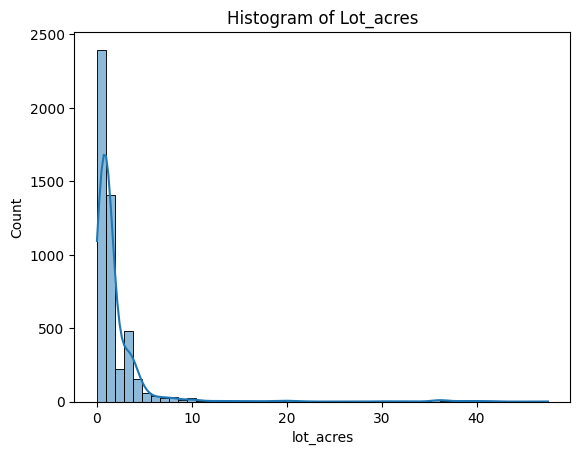

In [ ]:
sns.histplot(x = 'lot_acres', data = df, kde=True,bins=50)
plt.title("Histogram of Lot_acres")
plt.show()

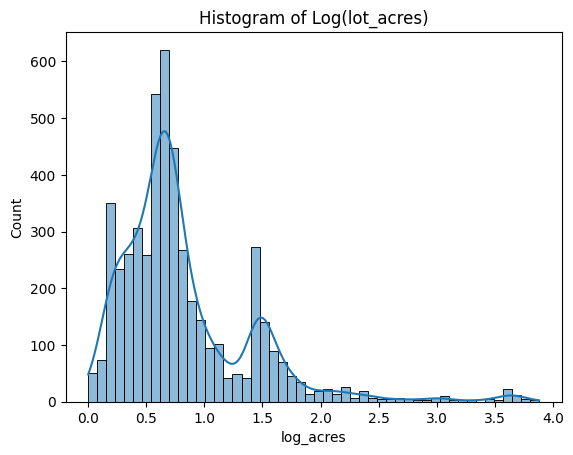

In [ ]:
sns.histplot(x = 'log_acres', data = df, kde=True,bins=50)
plt.title("Histogram of Log(lot_acres)")
plt.show()

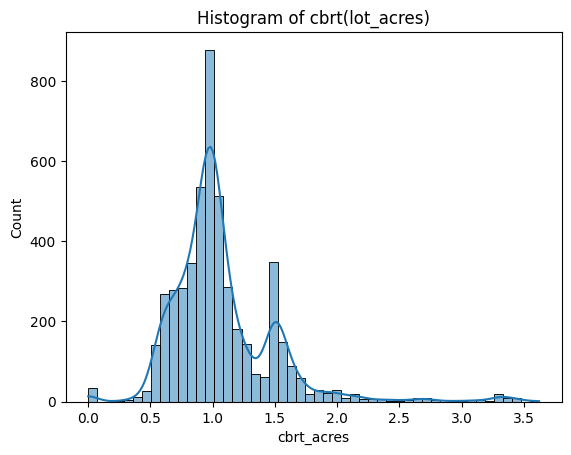

In [ ]:
sns.histplot(x = 'cbrt_acres', data =df, kde=True,bins=50)
plt.title("Histogram of cbrt(lot_acres)")
plt.show()

#Year Build

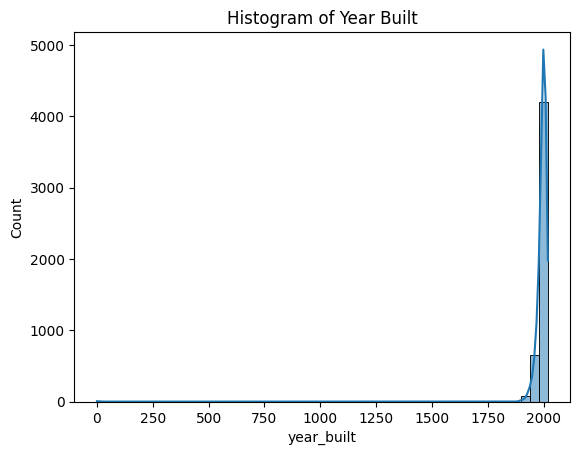

In [ ]:
sns.histplot(x = 'year_built', data =df, kde=True,bins=50)
plt.title("Histogram of Year Built")
plt.show()

#Removing the 3 records that had Year_build==0

In [ ]:
df=df[df.year_built>1750]

[link text](https://www.askpython.com/python/examples/find-distance-between-two-geo-locations)

In [ ]:
pip install haversine

In [ ]:
def distance(row):
  center=(df.latitude.mean(),df.longitude.mean())
  present=(row["latitude"],row["longitude"])
  result=hs.haversine(center,present,unit=Unit.KILOMETERS)
  return result

In [ ]:
df["distance"]=df.apply(distance,axis=1)

In [ ]:
lat_mean=float(df.latitude.mean().round(2))
lon_mean=float(df.longitude.mean().round(2))

In [ ]:
df['lat_direction'] = df['latitude'].apply(lambda x: 1 if x > lat_mean else 0)
df['lon_direction'] = df['longitude'].apply(lambda x: 1 if x > lon_mean else 0)

In [ ]:
df.lon_direction.value_counts()

,count
lon_direction,
0,2781
1,2150


In [ ]:
df.lat_direction.value_counts()

,count
lat_direction,
0,2509
1,2422


#Graphs

In [ ]:
len(df.columns)

48

In [ ]:
len(df.columns)

48

[link text](https://plotly.com/python/plotly-express/)

In [ ]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA', 'log_HOA',
       'dishwasher', 'freezer', 'refrigerator', 'oven', 'garbage disposal',
       'double sink', 'microwave', 'compactor', 'electric range', 'island',
       'appliance color', 'gas range', 'prep sink', 'countertops granite',
       'desk', 'lazy susan', 'pantry walk-in', 'pantry closet',
       'pantry cabinet', 'mexican tile', 'wood', 'natural stone', 'other',
       'ceramic tile', 'carpet', 'concrete', 'log_acres', 'cbrt_acres',
       'distance', 'lat_direction', 'lon_direction'],
      dtype='object')

In [ ]:
average_price_by_year = df.groupby('year_built')['sold_price'].mean().reset_index()
plt.figure(figsize=(10, 6))
fig = px.line(average_price_by_year, x="year_built", y="sold_price", title='Average Sold Price by Year Built',labels={'sold_price': 'Average Sold Price', 'year_built': 'Year Built'})
fig.show()

<Figure size 1000x600 with 0 Axes>

In [ ]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA', 'log_HOA',
       'dishwasher', 'freezer', 'refrigerator', 'oven', 'garbage disposal',
       'double sink', 'microwave', 'compactor', 'electric range', 'island',
       'appliance color', 'gas range', 'prep sink', 'countertops granite',
       'desk', 'lazy susan', 'pantry walk-in', 'pantry closet',
       'pantry cabinet', 'mexican tile', 'wood', 'natural stone', 'other',
       'ceramic tile', 'carpet', 'concrete', 'log_acres', 'cbrt_acres',
       'distance', 'lat_direction', 'lon_direction'],
      dtype='object')

#Scatter Plot

In [ ]:
fig = px.scatter(df, x='sqrt_ft', y='sold_price', title='Sold Price vs Square Footage')
fig.show()

In [ ]:
fig = px.scatter(df, x='taxes', y='sold_price', title='Sold Price vs Square Footage')
fig.show()

##Removing the Outlier(Taxes )

In [ ]:
df=df[df.taxes<2000000]

In [ ]:
df.zipcode=df.zipcode.astype(str)

In [ ]:
fig = px.scatter_map(df, lat="latitude", lon="longitude", color="zipcode", size="sold_price",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  map_style="carto-positron")
fig.show()

In [ ]:
df.zipcode=df.zipcode.astype(int)

In [ ]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,natural stone,other,ceramic tile,carpet,concrete,log_acres,cbrt_acres,distance,lat_direction,lon_direction
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,0,0,0,1,1,1.437463,1.475146,10.006104,0,1
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,...,1,1,0,0,0,0.982078,1.186421,2.700103,1,0
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,...,1,1,0,1,0,1.131402,1.280579,6.662904,0,1
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8.0,...,1,0,0,1,0,0.727549,1.022809,5.329261,1,1
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7.0,...,1,1,0,1,0,2.045109,1.888013,3.186108,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4929 entries, 4 to 4999
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MLS                  4929 non-null   int64  
 1   sold_price           4929 non-null   float64
 2   zipcode              4929 non-null   int64  
 3   longitude            4929 non-null   float64
 4   latitude             4929 non-null   float64
 5   lot_acres            4929 non-null   float64
 6   taxes                4929 non-null   float64
 7   year_built           4929 non-null   int64  
 8   bedrooms             4929 non-null   int64  
 9   bathrooms            4929 non-null   float64
 10  sqrt_ft              4929 non-null   float64
 11  garage               4929 non-null   float64
 12  kitchen_features     4929 non-null   object 
 13  fireplaces           4929 non-null   float64
 14  floor_covering       4929 non-null   object 
 15  HOA                  4929 non-null   float6

#Dropping the Columns

In [ ]:
df=df.drop(["MLS","longitude","latitude","lot_acres","log_acres","kitchen_features","floor_covering","HOA"],axis=1)

#Correlation

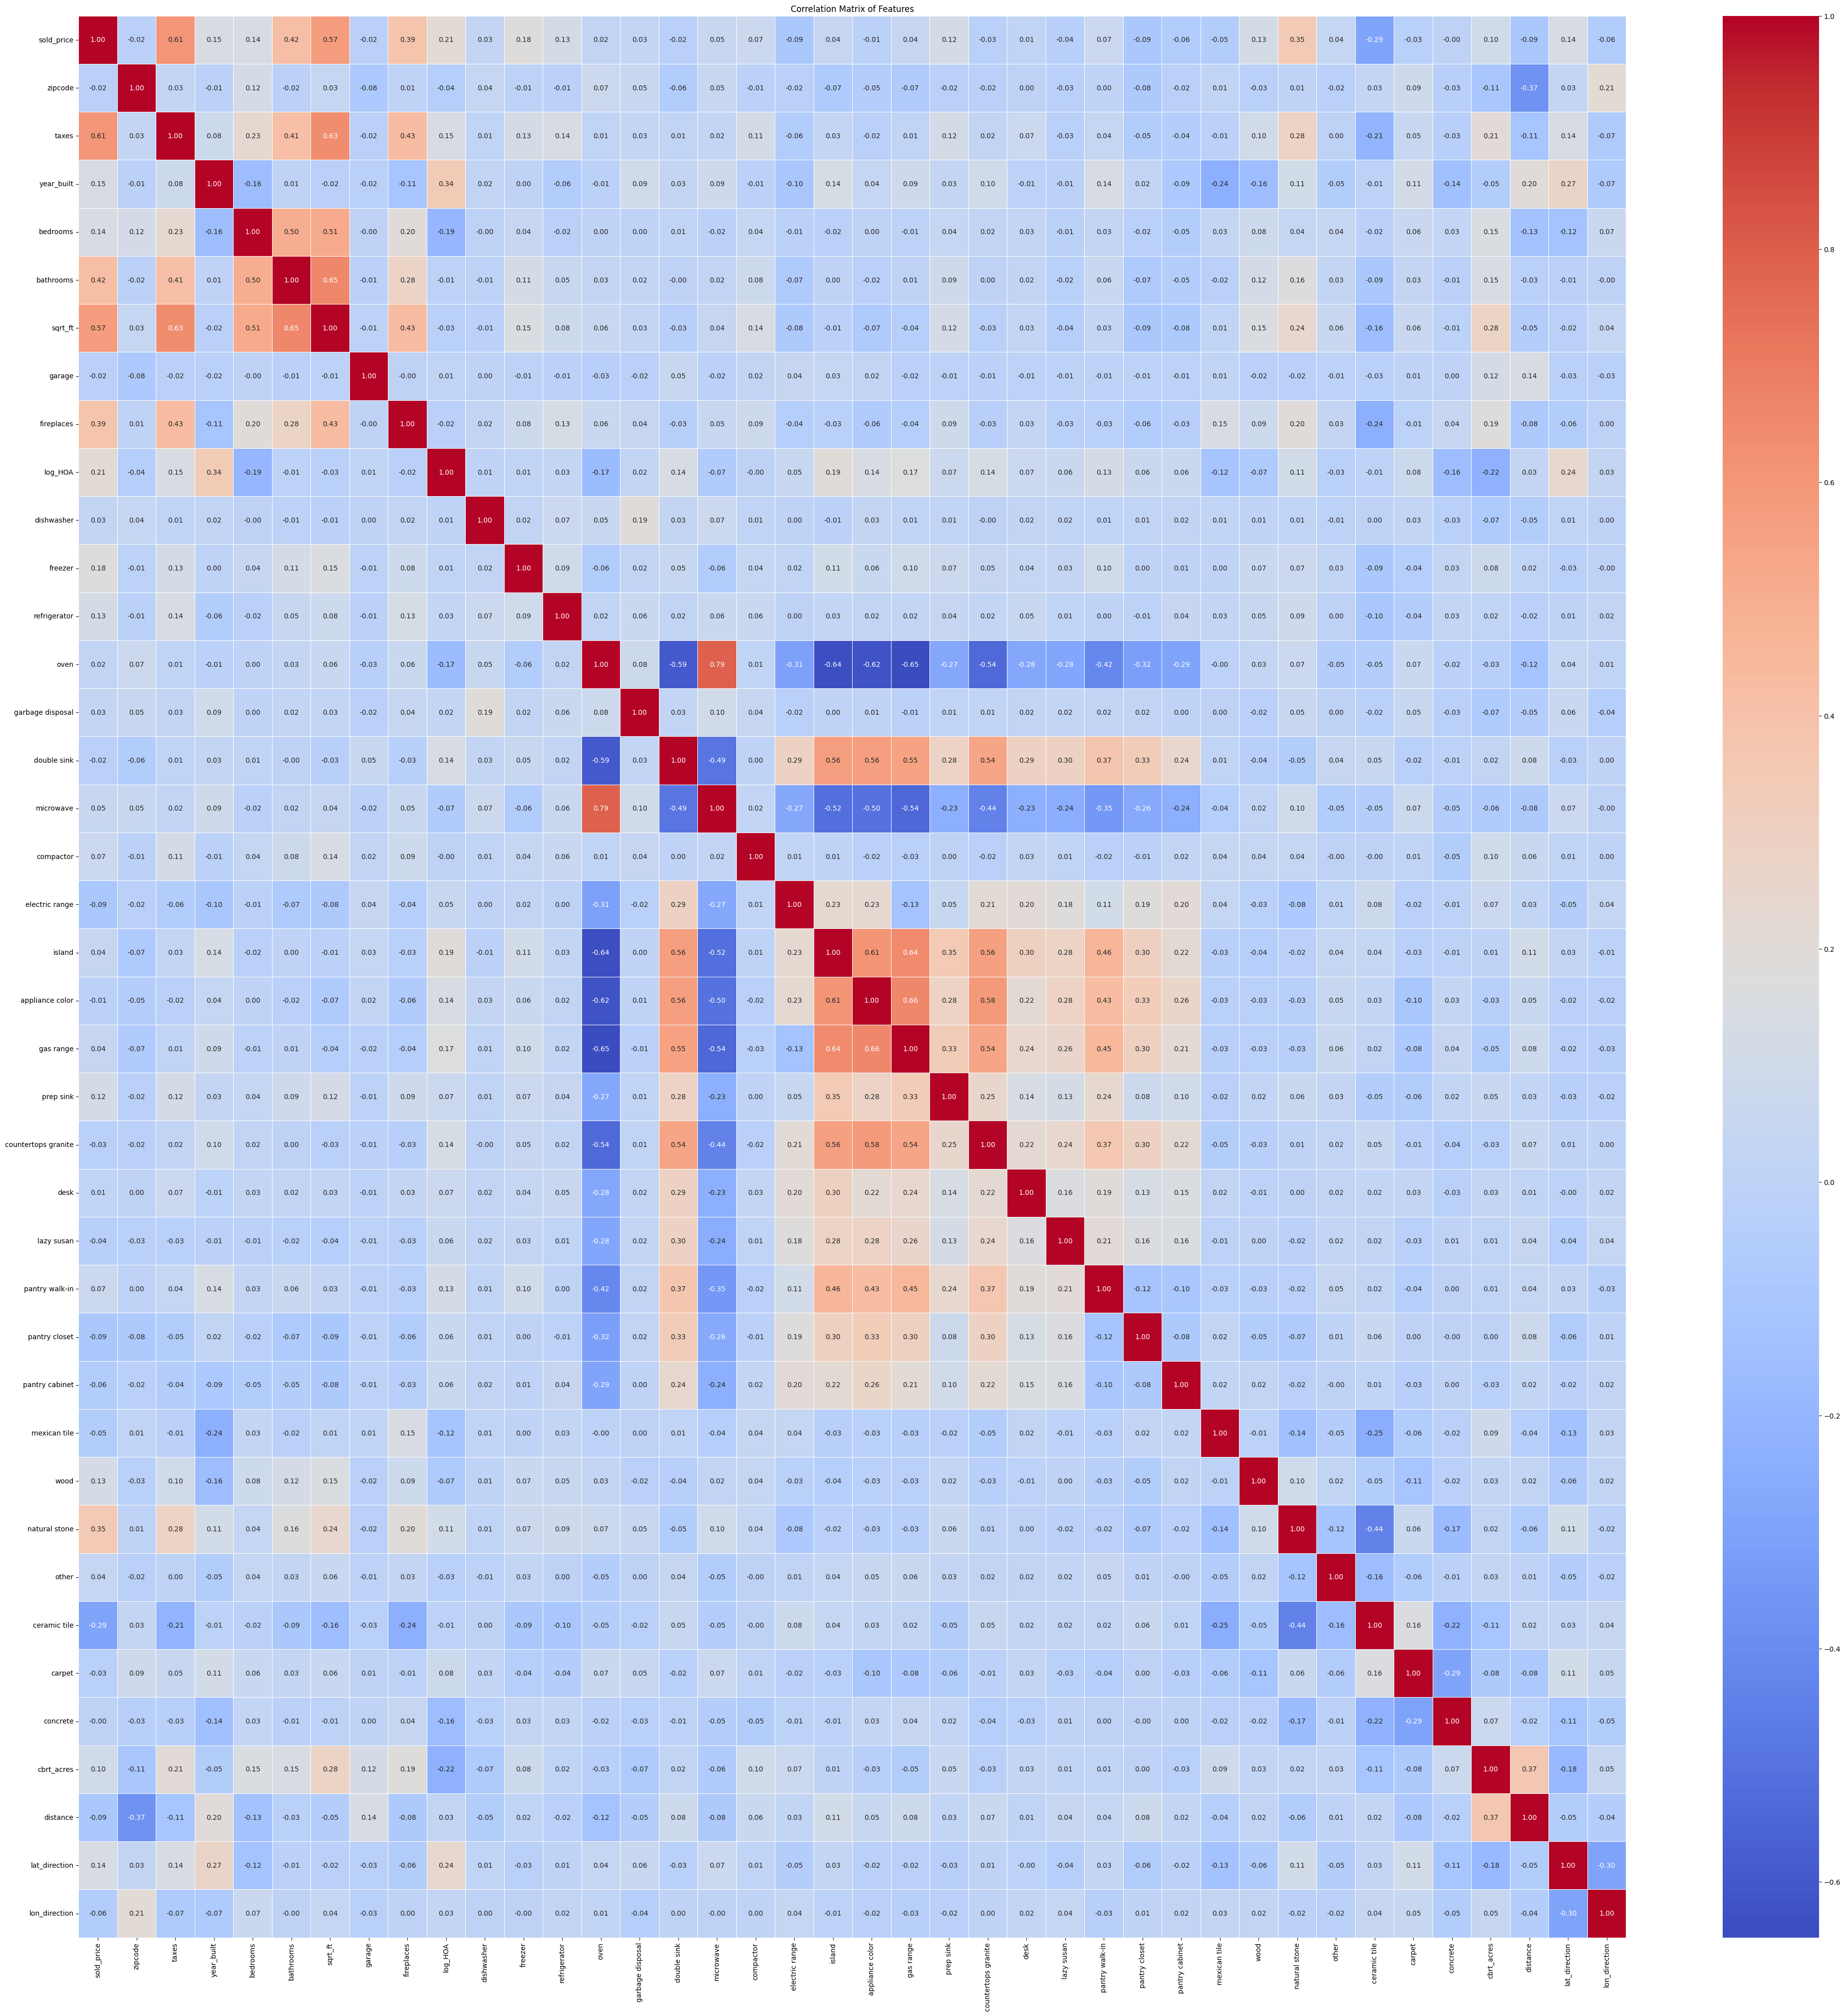

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
df.head()

,sold_price,zipcode,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,log_HOA,...,wood,natural stone,other,ceramic tile,carpet,concrete,cbrt_acres,distance,lat_direction,lon_direction
4,3411450.0,85750,15393.00,1995,4,6.0,6396.0,3.0,5.0,4.025352,...,0,0,0,0,1,1,1.475146,10.006104,0,1
5,3250000.0,85718,27802.84,1999,3,4.0,6842.0,3.0,5.0,6.047372,...,1,1,1,0,0,0,1.186421,2.700103,1,0
6,2400000.0,85712,19038.42,2001,9,8.0,12025.0,4.0,6.0,0.000000,...,1,1,1,0,1,0,1.280579,6.662904,0,1
7,2500000.0,85750,21646.00,2011,6,8.0,8921.0,4.0,5.0,5.398163,...,1,1,0,0,1,0,1.022809,5.329261,1,1
8,3700000.0,85718,25094.39,2002,5,7.0,5238.0,3.0,1.0,6.045005,...,1,1,1,0,1,0,1.888013,3.186108,1,0


#Saving the dataframe

In [ ]:
df=df.round(2)

In [ ]:
df.to_csv('House_Data.csv', index=False)

In [ ]:
df.shape

(4929, 40)

In [ ]:
df.head()

,sold_price,zipcode,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,log_HOA,...,wood,natural stone,other,ceramic tile,carpet,concrete,cbrt_acres,distance,lat_direction,lon_direction
4,3411450.0,85750,15393.00,1995,4,6.0,6396.0,3.0,5.0,4.03,...,0,0,0,0,1,1,1.48,10.01,0,1
5,3250000.0,85718,27802.84,1999,3,4.0,6842.0,3.0,5.0,6.05,...,1,1,1,0,0,0,1.19,2.70,1,0
6,2400000.0,85712,19038.42,2001,9,8.0,12025.0,4.0,6.0,0.00,...,1,1,1,0,1,0,1.28,6.66,0,1
7,2500000.0,85750,21646.00,2011,6,8.0,8921.0,4.0,5.0,5.40,...,1,1,0,0,1,0,1.02,5.33,1,1
8,3700000.0,85718,25094.39,2002,5,7.0,5238.0,3.0,1.0,6.05,...,1,1,1,0,1,0,1.89,3.19,1,0


In [ ]:
df.lon_direction.unique()

array([1, 0])

In [ ]:
df.lat_direction.unique()

array([0, 1])

In [ ]:
df.shape

(4929, 40)